

# Avaliação Inicial de Ciência dos dados

**2020 - 1o. semestre**

___
## Índice

- [Titanic](#titanic)
- [Questão 1](#q1)
- [Questão 2](#q2)
- [Questão 3](#q3)
- [Questão 4](#q4)
- [Questão 5](#q5)
___

<div id="titanic"></div>

## Titanic

Entre as muitas competições disponíveis na plataforma Kaggle, encontra-se a de *Machine Learning* do Titanic conforme apresentado neste [link](https://www.kaggle.com/c/titanic/data).

A base de dados apresentada no arquivo `titanic.xlsx` contém informação de 891 passageiros para os quais foram mensurados as seguintes informações (as categorias serão mantidas em inglês assim como os nomes das variáveis):
 
 * `Survived`: indica se passageiro sobreviveu ou não.
    - 0 = No,
    - 1 = Yes.
 * `Pclass`: indica a classe da passagem (*ticket*).
    - 1 = 1st, 
    - 2 = 2nd, 
    - 3 = 3rd.
 * `Sex`: sexo do passageiro. 
    - female,
    - male.
 * `Age`: idade em anos.
 * `Sibsp`: número de irmãos e/ou cônjuges a bordo do Titanic.
 * `Parch`: número de pais e/ou filhos a bordo do Titanic.
 * `Ticket`: número do *ticket*.
 * `Fare`: tarifa do passageiro.
 * `Cabin`: número da cabine.
 * `Embarked`: portão de embarque.
    - C = Cherbourg, 
    - Q = Queenstown, 
    - S = Southampton.


**Notas:**
A variável `Pclass` pode ser considerada uma *proxy* da situação socioeconômico do passageiro, ou seja, 
1st = Upper, 2nd = Middle,  3rd = Lower.


___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\User\Desktop\INSPER\CIENCIA DE DADOS\ESTUDOS\Simulado_DataScience\S01


Carregando os dados do arquivo `titanic.xlsx`:

In [3]:
titanic = pd.read_excel('titanic.xlsx')

Para facilitar algumas análises nesta **Avaliação**, vamos excluir os passageiros que não possuem informação para a variável `Age` usando o comando `dropna()`:

In [25]:
dados = titanic.dropna(subset = ['Age']).copy()

Para saber quantas linhas (passageiros) e colunas (variáveis) há no *DataFrame* nomeado `dados`:

In [26]:
dados.shape

(714, 12)

___
**Definindo as variáveis qualitativas como categóricas:**

O pandas não tem como saber quais variáveis são qualitativas ao carregar os dados. Então precisamos modificar as colunas explicitamente.

Já deixamos isso pronto para você nesta avaliação:

In [27]:
dados.loc[:,'Survived'] = dados['Survived'].astype('category')
dados.loc[:,'Pclass'] = dados['Pclass'].astype('category')
dados.loc[:,'Sex'] = dados['Sex'].astype('category')
dados.loc[:,'Cabin'] = dados['Cabin'].astype('category')
dados.loc[:,'Embarked'] = dados['Embarked'].astype('category')

Agora vamos renomear os rótulos das variáveis qualitativas `Survived` e `Pclass` com comando: `.cat.categories`:

In [28]:
dados.Survived.cat.categories = ['No', 'Yes']
dados.Pclass.cat.categories = ['1st','2nd','3rd']

___
***DataFrame* `dados` que deve considerar na resolução das questões a seguir:**

In [8]:
dados.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<div id="q1"></div>

___
### Questão 1

Faça as seguintes manipulações:
 1. **[1 ponto]** Filtre apenas as linhas dos passageiros que **viajaram na segunda classe** e que **sobreviveram** e selecione as variáveis: `Age` e `Fare`. Guarde esse subconjunto em um novo *DataFrame* chamado `surv`.
 
 $\hspace{0.5mm}$
 1. **[1 ponto]** Nesse subconjunto `surv`, encontre o passageiro que pagou o maior valor de tarifa. Se houver mais de um, encontre o mais velho. 

In [9]:
# Coloque seu código aqui...
#1)

filtroclasse = dados['Pclass'] == '2nd'
filtrovivo = dados['Survived'] == 'Yes'

surv = dados.loc[:, ['Pclass', 'Survived', 'Age', 'Fare']]
surv = surv.loc[filtroclasse & filtrovivo, :]

#2)

surv = surv.sort_values(by='Fare', ascending = False).head(5)
surv
#O PASSAGEIRO DESEJADO PELO EXERCICIO 2 É O #754


 

,Pclass,Survived,Age,Fare
615,2nd,Yes,24.0,65.0000
754,2nd,Yes,48.0,65.0000
43,2nd,Yes,3.0,41.5792
608,2nd,Yes,22.0,41.5792
618,2nd,Yes,4.0,39.0000


<div id="q2"></div>

___
### Questão 2

Faça as seguintes manipulações considerando o *DataFrame* `dados`:
  1. **[1 ponto]** Crie uma variável chamada `Age_group` que contenha as seguintes categorias a partir da variável `Age`:
        * `Age` $<20$ years $\rightarrow$ **child or teen**
        * $20\leq$ `Age` $<60$ years $\rightarrow$ **adult**
        * `Age` $\geq60$ years $\rightarrow$ **senior**
  
  $\hspace{0.5mm}$
  1. **[1 ponto]** Construa uma tabela de **frequências relativas** dessa nova variável `Age_group`. 

In [69]:
# Coloque seu código aqui...
labels = ['child or teen', 'adult', 'senior']
Age_group = pd.cut(dados['Age'], bins = [0, 20, 60, 100], labels = labels, right = False)
Age_group = Age_group.value_counts(True)
Age_group.to_frame()

,Age
adult,0.733894
child or teen,0.229692
senior,0.036415


In [20]:
#OU
def filtroidade(linha):
    if linha < 20:
        return 'child or teen'
    if linha >= 20 and linha < 60:
        return 'adult'
    if linha >= 60:
        return 'senior'
    
Age_group = dados['Age'].apply(filtroidade)
Age_group.value_counts(True).to_frame()

,Age
adult,0.733894
child or teen,0.229692
senior,0.036415


<div id="q3"></div>

___
### Questão 3

Faça as seguintes manipulações considerando o *DataFrame* `dados`:
  1. **[1 ponto]** Crie uma tabela cruzada com as variáveis `Survived` e `Pclass` que contenha **as frequências relativas** que permitam visualizar o percentual de passageiros em cada categoria de `Pclass` **relativo ao total de passageiros em cada nível de `Survived`**.
  
  $\hspace{0.5mm}$
  1. **[1 ponto]** Dos passageiros não sobreviventes, qual a frequência relativa (em decimal) destes que viajaram  na 3rd classe? E dos passageiros sobreviventes, qual a frequência relativa (em decimal) destes que viajaram  na 1st classe?


In [70]:
# Coloque seu código aqui...
#1)
firstQ = pd.crosstab(dados['Survived'], dados['Pclass'], margins = True, normalize = 'index')
firstQ

#2)
# DOS PASSAGEIROS QUE NÃO SOBREVIVERAM, 0.636 ERAM DA 3rd CLASSE;
# JÁ DOS QUE SOBREVIVERAM, 0.420 ERAM DA 1st CLASSE.


Pclass,1st,2nd,3rd
Survived,,,
No,0.150943,0.212264,0.636792
Yes,0.420690,0.286207,0.293103
All,0.260504,0.242297,0.497199


<div id="q4"></div>

___
### Questão 4

Faça as seguintes manipulações considerando o *DataFrame* `dados`:

  1. **[1 ponto]** Para **cada nível da variável `Survived`**, crie uma tabela com medidas-resumo da variável `Fare`.
  
  $\hspace{0.5mm}$
  1. **[1 ponto]** 
  Verifique quais afirmações estão corretas de acordo com as medidas-resumo calculadas no item anterior.
- 25% dos passageiros não sobreviventes pagaram, no máximo aproximadamente, 7.89 no valor da tarifa. 
- No Dataframe dados, há 424 passageiros sobreviventes. 
- A minoria dos passageiros não sobreviventes pagou, em média aproximadamente, mais do que 22.965 no valor da tarifa. 
- 25% dos passageiros sobreviventes pagaram, no mínimo aproximadamente, 13.00 no valor da tarifa. 
- A medida coeficiente de variação é dada pelo desvio padrão dividido pela média., permitindo interpretar a dispersão relativamente a média. Neste caso, a dispersão relativa a média da variável Fare é levemente menor entre os passageiros sobreviventes do que entre os não sobreviventes. 

In [71]:
# Coloque seu código aqui...
#1)
dados_yes = dados.loc[dados['Survived'] == 'Yes',:]
dados_no = dados.loc[dados['Survived'] == 'No',:]

fare_yes = dados_yes['Fare']
fare_no = dados_no['Fare']


#for title, var_quanti in (('Yes', fare_yes), ('No', fare_no)):
 #   print('-' * 5 * len(title))
 #   print('Sobreviveu? {}'.format(title))
  #  print('-' * 5 * len(title))
  #  print(f'Contagem               = {len(var_quanti)}')
  #  print(f'Tarifa Média           = {var_quanti.mean():.3f}')
  #  print(f'Tarifa Mínima          = {var_quanti.min():.3f}')
 #   print(f'Primeiro quartil (Q1)  = {var_quanti.quantile(q=0.25):.3f}')
 #   print(f'Mediana          (Q2)  = {var_quanti.median():.3f}')
 #   print(f'Terceiro quartil (Q3)  = {var_quanti.quantile(q=0.75):.3f}')
 #   print(f'Tarifa Máxima          = {var_quanti.max():.3f}')
 #   print(f'Variância amostral     = {var_quanti.var():.3f}')
 #   print(f'Desvio padrão amostral = {var_quanti.std():.3f}')
  #  print(f'Coeficiente de variação= {(var_quanti.std()/var_quanti.mean()):.3f}')
  #  print()
dados.groupby('Survived')['Fare'].describe()
    
#2) 1- V
#   2- F
#   3- F
#   4- F
#   5- V


,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
No,424.0,22.965456,31.448825,0.0,7.8958,11.8875,26.55,263.0000
Yes,290.0,51.843205,70.458776,0.0,13.0000,26.2500,66.20,512.3292


<div id="q5"></div>

___
### Questão 5

Estude a associação entre as variáveis `Age` e `Fare` separando os passageiros sobreviventes dos não sobreviventes.

É possível afirmar, por exemplo, que pessoas mais velhas tendem a pagar por tarifas mais caras? E a associação entre essas variáveis quantitativas se dá da mesma forma entre os sobreviventes e não sobreviventes?

Para investigar tais hipóteses, faça:

 1. **[0.5 ponto]** Gere um **gráfico de dispersão** entre as variáveis `Age` e `Fare` considerando os passageiros sobreviventes e não sobreviventes separadamente.
 
 $\hspace{0.5mm}$
 1. **[0.5 ponto]** Calcule o **coeficiente de correlação linear** entre as variáveis `Age` e `Fare` só com os passageiros não sobreviventes. E a correlação só com os sobreviventes.
 
 $\hspace{0.5mm}$
 1. **[1 ponto]** **No Blackboard, responda as perguntas com base nos resultados dos itens anteriores.**

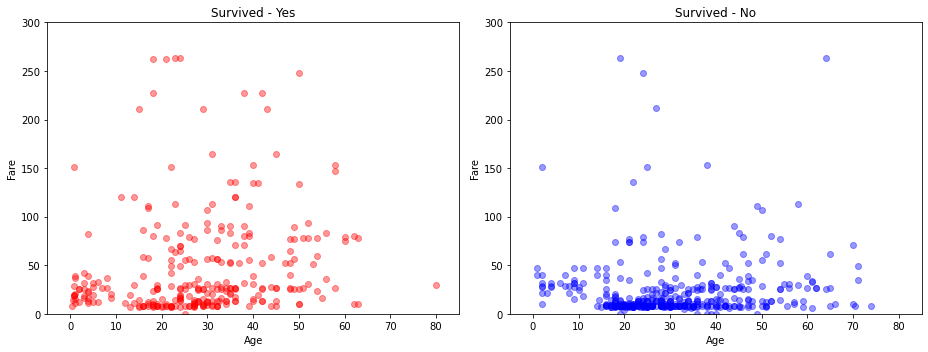

In [72]:
# Coloque seu código aqui...
fig = plt.figure(figsize=(13, 5))

plt.subplot(121)
plt.scatter(dados.Age[dados.Survived=='Yes'], dados.Fare[dados.Survived=='Yes'], c='red', alpha=0.4)
plt.title('Survived - Yes')
plt.ylabel('Fare')
plt.ylim(0,300)
plt.xlabel('Age')
plt.xlim(-5,85)

plt.subplot(122)
plt.scatter(dados.Age[dados.Survived=='No'], dados.Fare[dados.Survived=='No'], c='blue', alpha=0.4)
plt.title('Survived - No')
plt.ylabel('Fare')
plt.ylim(0,300)
plt.xlabel('Age')
plt.xlim(-5,85)

plt.tight_layout()
plt.show()